# Stability and Stiffness of ODEs

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Stability
    - ODEs
    - ODE integration methods
- Stiff ODEs

The code presented here is not for reference purpose but for plotting demonstration figures.

## Stability of ODEs and integration methods

Here we explore the stability of ODEs and integration methods. The stability of ODEs is dependent on its solution, whereas the stability of integration methods depend on the time step and the nature of the ODE being integrated. To get optimal numerical solution, the stability of ODE and the integration method should match.

### Stability of ODEs

An ODE is unstable when

- two solutions obtained by two close initial conditions diverges (gets apart) over time
- solution is unbounded, approaching $\infty$ over time

An ODE is stable when

- two solutions obtained by two close initial conditions converges (gets closer) over time
- solution is bounded, decaying to a finite value over time

**Problem Statement.** Consider the linear first-order ODE

$$
\dot{x} = ax
$$

whose solution is

$$
x(t) = x(0)e^{at}.
$$

Determine the stability of the ODE for all $a$.

**Solution.** When $a > 0$, the solution of the ODE grows exponentially, being unstable. When $a \le 0$, the solution of the ODE decays exponentially (or stays constant), being stable.

### Stability of ODE integration methods

A method is unstable when the error magnifies over time. A method is stable when the error decreases over time. The region of stability of method varies for different ODEs and time steps.

**Problem Statement.** Determine the region of stability of forward and backward Euler on the ODE

$$
\dot{x} = ax.
$$

**Solution.** We limit our scope to real $a \in \mathbb{R}$. Forward Euler method combined with the ODE gives

$$
\begin{aligned}
x_{k+1} &= x_k + \dot{x}_k\Delta t \\
x_{k+1} &= x_k + ax_k\Delta t \\
x_{k+1} &= (1 + a\Delta t) x_k \\
\end{aligned}
$$

at each step. The method is unstable over time ($x_{k+1}$ becomes unbounded) when

$$
|1 + a\Delta t| > 1
$$

$$
\begin{aligned}
1 + a\Delta t &> 1 &\text{ and }&& 1 + a\Delta t &< -1 \\
a\Delta t &> 0 &\text{ and }&&  a\Delta t &< -2 \\
\end{aligned}
$$

Backward Euler method combined with the ODE gives

$$
\begin{aligned}
x_{k+1} &= x_{k} + \dot{x}_{k+1}\Delta t \\
x_{k+1} &= x_{k} + ax_{k+1}\Delta t \\
(1-a\Delta t) x_{k+1} &= x_k \\
x_{k+1} &= (1-a\Delta t)^{-1} x_k \\
\end{aligned}
$$

at each step. The method is unstable over time ($x_{k+1}$ becomes unbounded) when

$$
\bigg|\dfrac{1}{1 - a\Delta t}\bigg| > 1
$$

$$
\begin{aligned}
\dfrac{1}{1 - a\Delta t} &> 1 &\text{ and }&& -\dfrac{1}{1 - a\Delta t} &> 1 \\
1 - a\Delta t &< 1 &\text{ and }&& -(1 - a\Delta t) &< 1 \\
a\Delta t &> 0 &\text{ and }&&  a\Delta t &< 2 \\
\end{aligned}
$$

To summarize,

|Stability|Forward Euler|Backward Euler|
|-|-|-|
|Stable for $a\Delta t \in$|$[-2, 0]$|$(-\infty, 0)\cup(2, \infty)$|
|Unstable for $a\Delta t \in$|$(-\infty, -2)\cup(0, \infty)$|$[0, 2]$|

The stability of the methods therefore depends both on the coefficient $a$ and the time step $\Delta t$.

### Application of stability

To get optimal numerical solution for an ODE, the stability of the method should match the stability of the ODE:

- a stable method should be used for stable ODE
- an unstable method should be used for unstable ODE.

Note that the stability of a method depends both on the coefficient $a$ and the time step $\Delta t$.

**Problem Statement.** Demonstrate (in)stability of forward and backward Euler methods for

$$
\dot{x} = ax
$$

where $a = 2, -2$ with time steps $\Delta t = 0.1, 0.3, 0.9, 1.1$ and appropriate initial conditions. Compare both methods with RK4 ("exact") solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
def forward_euler(ode, initial_val, t):
    t_len = len(t)
    dt = np.diff(t[:2])
    x_forward = np.zeros(t_len)
    x_forward[0] = initial_val

    for i in range(t_len - 1):
        x_forward[i+1] = x_forward[i] + ode(t[i], x_forward[i])*dt
    
    return x_forward

In [3]:
def backward_euler(ode, initial_val, t):
    t_len = len(t)
    dt = np.diff(t[:2])
    x_backward = np.zeros(t_len)
    x_backward[0] = initial_val

    for i in range(t_len - 1):
        g = lambda y : y - x_backward[i] - ode(t[i+1], y)*dt
        x_backward[i+1] = scipy.optimize.root(g, x_backward[i]).x

    return x_backward

In [4]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

In [5]:
def stability_demo(a, initial_val):
    '''
    Plot forward Euler, backward Euler, and RK4 ("exact") solution for given time steps,
    with user input coefficient of the ODE and initial condition.
    The plot demonstrates the stability of ODE and integration method
    
    :param a: stiffness parameter of ODE
    :param initial_val: initial condition of ODE
    '''
    
    # initial condition
    initial_val = np.array([initial_val])

    # time array
    exact_t = np.linspace(0, 10, 1000)
    t_initial = 0
    t_final = 10
    dt = np.linspace(0.1, 1.1, 6)
    
    # linear ode with coefficient a
    dxdt = lambda t, x : a*x

    # slope field
    tvec = np.linspace(0, 10, 30)
    xvec = np.linspace(-2, 10, 15)
    T, X = np.meshgrid(tvec, xvec)

    # initialize figure
    row = 3
    col = 2
    fig, axs = plt.subplots(row, col, figsize=(col*5, row*3), sharex=True, sharey=True)
    # shared x and y label
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
    plt.xlabel('$t$')
    plt.ylabel('$x$')

    # plot soln curve
    for row_i in range(row):
        for col_i in range(col):
            i = row_i*col + col_i
            # time array
            t = np.arange(t_initial, t_final+dt[i]/2, dt[i])
            # solve ode
            forward_soln = forward_euler(dxdt, initial_val, t)
            backward_soln = backward_euler(dxdt, initial_val, t)
            exact_soln = scipy.integrate.solve_ivp(dxdt, [t_initial, t_final], initial_val, t_eval=exact_t).y[0]
            # plot field and soln
            scale = np.sqrt(1**2 + dxdt(T, X)**2)
            axs[row_i, col_i].quiver(T, X, np.ones_like(dxdt(T, X))/scale, dxdt(T, X)/scale, scale, cmap='winter_r', scale=25, width=0.004)
            axs[row_i, col_i].plot(0, initial_val, 'o', color='black')
            axs[row_i, col_i].plot(exact_t, exact_soln, '-', color='black', label='RK4')
            axs[row_i, col_i].plot(t, forward_soln, '.-', color='red', label='Forward Euler')
            axs[row_i, col_i].plot(t, backward_soln, '.-', color='blue', label='Backward Euler')
            # plot setting
            axs[row_i, col_i].set_xlim(0, 10)
            axs[row_i, col_i].set_ylim(-2, 10)
            axs[row_i, col_i].set_title('$\dot{x} = ' + f'{a}x$' + f' $(\Delta t = {dt[i] :.1f})$')
            # compromised legend for common xylabels
            if row_i == 0 and col_i == (col-1):
                axs[row_i, col_i].legend(loc='upper right')

#### Stability of $\dot{x} = 2x$

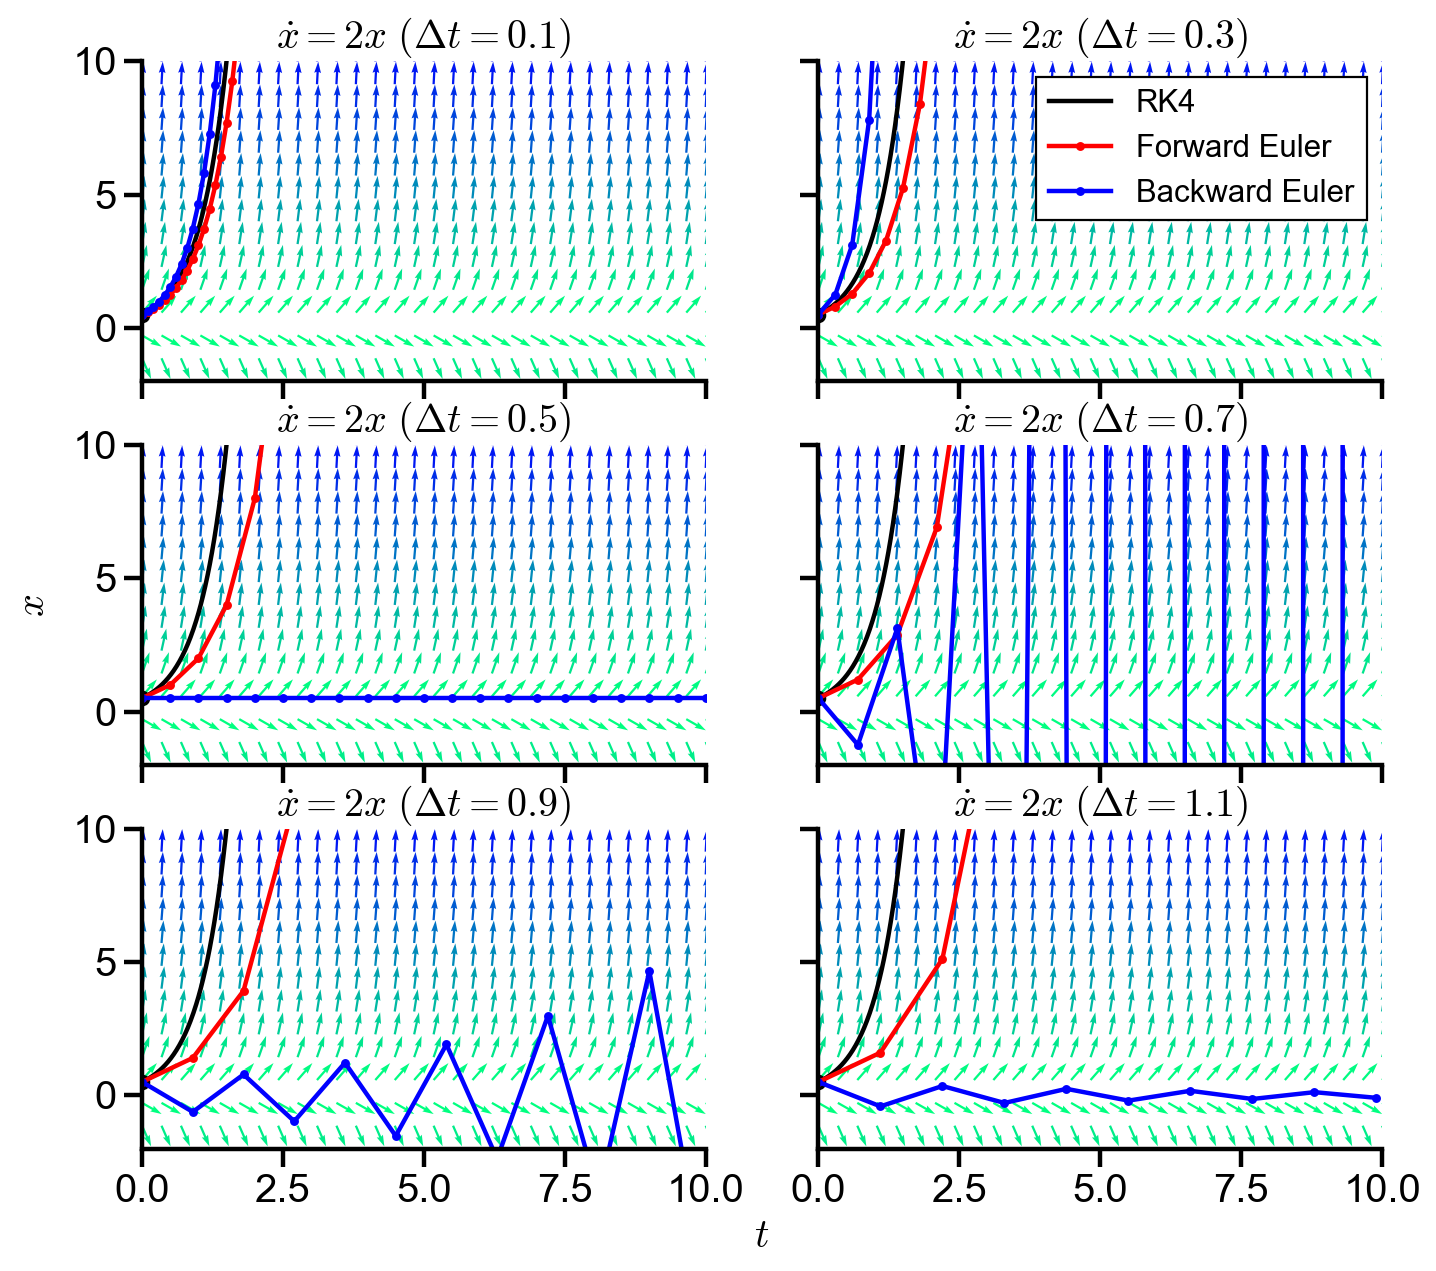

In [6]:
stability_demo(a=2, initial_val=0.5)

▲ The figure above shows the RK4, forward Euler, and backward Euler solutions to $\dot{x} = 2x$ with initial condition $x(0) = 0.5$, having a solution $x(t) = 0.5e^{2t}$. Because the solution is unbounded, the ODE is unstable. We therefore need an unstable method for optimal numerical solution.

$\Delta t = 0.1$ - Because $a\Delta t = 0.2$, both methods are unstable. The figure confirms that both methods have small and comparable errors.

$\Delta t = 0.3$ - Because $a\Delta t = 0.6$, both methods are unstable. The figure shows that the error gets larger with bigger time step, as expected.

$\Delta t = 0.5$ - Because $a\Delta t = 1$, forward Euler is unstable. However, backward Euler fails because the denominator $1-a\Delta t=0$, causing zero division error.

$\Delta t = 0.7$ - Because $a\Delta t = 1.4$, both methods are unstable. Note that backward Euler exhibits oscillatory behavior. Because $(1-a\Delta t)^{-1}$ is negative, $x_{k+1}$ changes sign for every iteration. The oscillation is still unbounded, confirming its instability.

$\Delta t = 0.9$ - Because $a\Delta t = 1.8$, both methods are unstable. The oscillatory behavior of backward Euler is less pronounced because $(1-a\Delta t)^{-1}$ decreases in absolute value as $\Delta t$ increases, so $x_{k+1}$ changes less in absolute value for each iteration comparing with $\Delta t = 0.7$.

$\Delta t = 1.1$ - Because $a\Delta t = 2.2$, forward Euler is unstable, but backward Euler is stable. Backward Euler's stability gives a decaying solution, which is incompatible with the instability of the ODE's growing solution.

#### Stability of $\dot{x} = -2x$

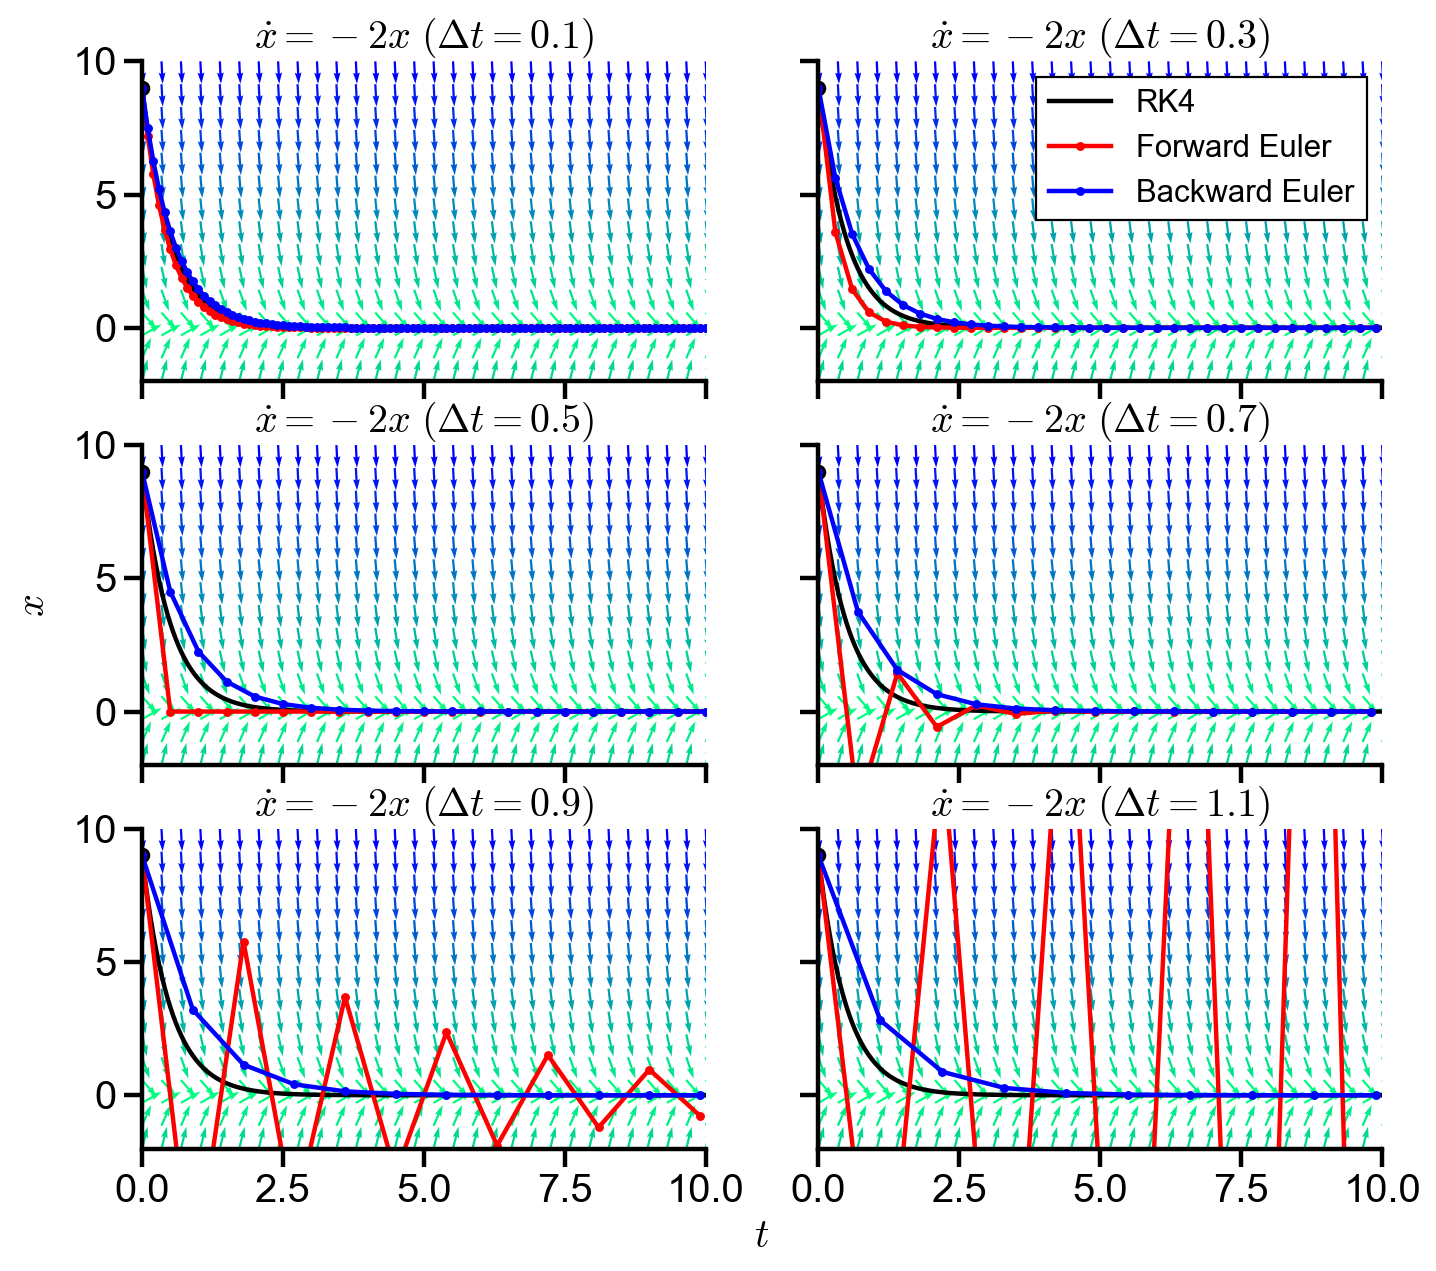

In [7]:
stability_demo(a=-2, initial_val=9)

▲ The figure above shows the RK4, forward Euler, and backward Euler solutions to $\dot{x} = -2x$ with initial condition $x(0) = 9$, having a solution $x(t) = 9e^{-2t}$. Because the solution is bounded, the ODE is stable. We therefore need a stable method for optimal numerical solution.

$\Delta t = 0.1$ - Because $a\Delta t = -0.2$, both methods are stable. The figure confirms that both methods have small and comparable errors.

$\Delta t = 0.3$ - Because $a\Delta t = -0.6$, both methods are unstable. The figure shows that the error gets larger with bigger time step, as expected. Note that backward Euler is giving better results than forward Euler.

$\Delta t = 0.5$ - Because $a\Delta t = -1$, backward Euler is stable. However, forward Euler fails because the iteration coefficient $1+a\Delta t=0$, so $x_{k+1}$ returns 0 for each iteration.

$\Delta t = 0.7$ - Because $a\Delta t = -1.4$, both methods are stable. Note that forward Euler exhibits decaying oscillatory behavior. Because $1+a\Delta t$ is negative, $x_{k+1}$ changes sign for every iteration. The oscillation is still bounded, confirming its stability.

$\Delta t = 0.9$ - Because $a\Delta t = -1.8$, both methods are stable. The oscillatory behavior of forward Euler is more pronounced because $1+a\Delta t$ increases in absolute value as $\Delta t$ increases, so $x_{k+1}$ changes more in absolute value for each iteration than that of $\Delta t = 0.7$.

$\Delta t = 1.1$ - Because $a\Delta t = -2.2$, forward Euler is unstable, but backward Euler is stable. Forward Euler's instability gives a growing solution, which is incompatible with the stability of the ODE's bounded solution. Although with some error, backward Euler's stability gives a qualitatively correct decaying solution.

## Stiff ODE

Stiff ODE is an ODE that is unstable for numerical methods unless the step size is taken to be extremely small. The stiffness is caused by rapid changing derivative that requires small step size to be captured by numerical methods. Here, we demonstrate the need of small step size for forward Euler and the stability of backward Euler.

**Problem Statement.** Consider the ODE

$$
\dot{x} = a(\sin t - x)
$$

where $a$ is a constant that represents stiffness, with the initial condition $x(0) = 0$. Plot the RK4, forward Euler, and backward Euler solutions of the ODE with constants $a = 2, 10, 100$ using time steps $\Delta t = 0.1, 0.3, 0.9, 1.1$ in the interval $t \in [0, 10]$.

In [8]:
def stiff_demo(a):
    '''
    Plot forward Euler, backward Euler, and RK4 ("exact") solution for given time steps,
    with user input stiffness of the ODE.
    The plot demonstrates the need of small time step for stiff ODEs.
    
    :param a: stiffness parameter of ODE
    '''
    
    # initial condition
    initial_val = np.array([0])
    
    # time array
    exact_t = np.linspace(0, 10, 1000)
    t_initial = 0
    t_final = 10
    dt = np.array([0.1, 0.3, 0.9, 1.1])
    
    # slope field
    tvec = np.linspace(0, 10, 30)
    xvec = np.linspace(-3, 3, 10)
    T, X = np.meshgrid(tvec, xvec)
    
    # ode with stiffness a
    dxdt = lambda t, x : a*(np.sin(t)-x)
    
    # initialize figure
    row = 2
    col = 2
    fig, axs = plt.subplots(row, col, figsize=(col*5, row*3), sharex=True, sharey=True)
    # shared x and y label
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
    plt.xlabel('$t$')
    plt.ylabel('$x$')

    # plot soln curve
    for row_i in range(row):
        for col_i in range(col):
            i = row_i*col + col_i
            # time array
            t = np.arange(t_initial, t_final+dt[i]/2, dt[i])
            # solve ode
            forward_soln = forward_euler(dxdt, initial_val, t)
            backward_soln = backward_euler(dxdt, initial_val, t)
            exact_soln = scipy.integrate.solve_ivp(dxdt, [t_initial, t_final], initial_val, t_eval=exact_t).y[0]
            # plot field and soln
            scale = np.sqrt(1**2 + dxdt(T, X)**2)
            axs[row_i, col_i].quiver(T, X, np.ones_like(dxdt(T, X))/scale, dxdt(T, X)/scale, scale, cmap='winter_r', scale=25, width=0.004)
            axs[row_i, col_i].plot(0, initial_val, 'o', color='black')
            axs[row_i, col_i].plot(exact_t, exact_soln, '-', color='black', label='RK4')
            axs[row_i, col_i].plot(t, forward_soln, '.-', color='red', label='Forward Euler')
            axs[row_i, col_i].plot(t, backward_soln, '.-', color='blue', label='Backward Euler')
            # # plot setting
            axs[row_i, col_i].set_xlim(0, 10)
            axs[row_i, col_i].set_ylim(-3, 3)
            axs[row_i, col_i].set_title('$\dot{x} = a(\sin(t) - x)$' + f' $(\Delta t = {dt[i]})$')
            # compromised legend for common xylabels
            if row_i == 0 and col_i == (col-1):
                axs[row_i, col_i].legend(loc='upper left', bbox_to_anchor=(1, 1))

#### Stiffness for $a = 2$

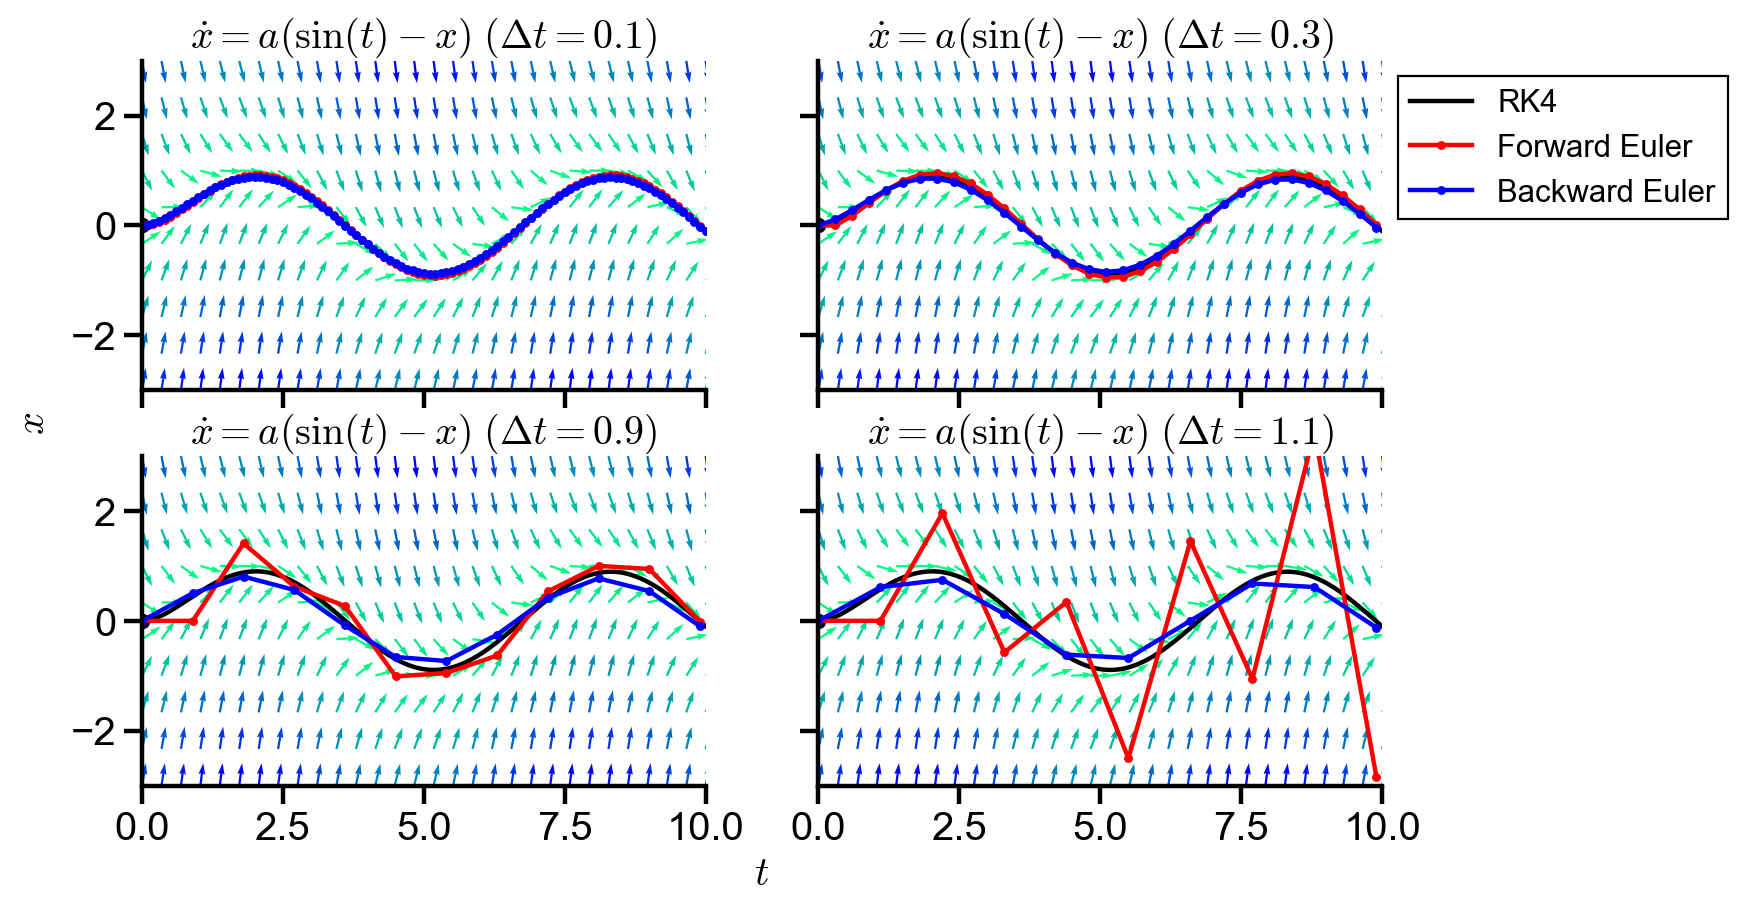

In [9]:
stiff_demo(a=2)

▲ The figure above shows the numerical solutions of the ODE with $a=2$. The ODE is not a stiff ODE because of the smoothly changing slope field.

$\Delta t = 0.1$ - At small time step, both forward and backward Euler agrees closely with the RK 4 solution.

$\Delta t = 0.3$ - As time step increases, the error of the methods increases.

$\Delta t = 0.9$ - At a larger time step, forward Euler exhibits greater error because it overshoots the exact solution at every time step. Backward Euler continues to perform well with relatively small error because it backtracks the derivative to avoid over shoot.

$\Delta t = 1.1$ - The overshoot problem of forward Euler is magnified at large time step; it starts to become unstable as the value at each iteration gets away from the exact solution. Backward Euler continues to perform well because of the backtrack strategy.

#### Stiffness for $a = 10$

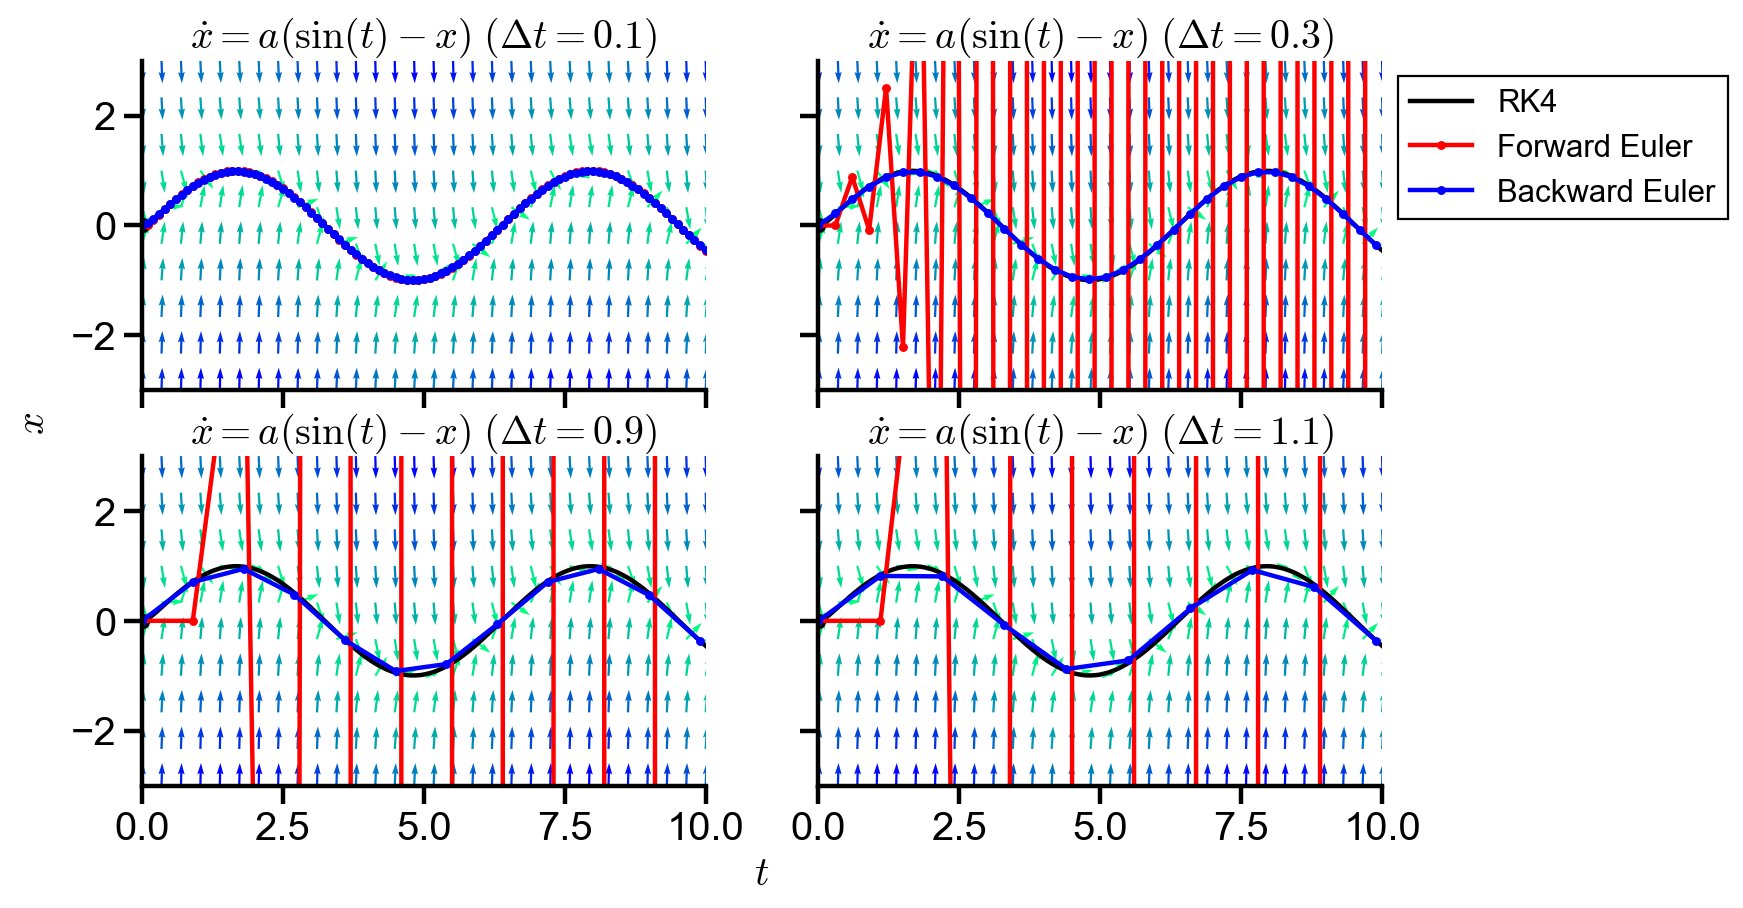

In [10]:
stiff_demo(a=10)

▲ The figure above shows the numerical solutions of the ODE with $a=10$. The ODE is a stiff ODE because of the rapidly changing slope field shown by almost vertical slope field away from the solution, with only minor changes shown near the solution.

$\Delta t = 0.1$ - At small time step, both forward and backward Euler agrees closely with the RK4 solution.

$\Delta t = 0.3$ - Forward Euler starts to overshoot even with minor increase in step size because of the rapid changing derivative at regions not close to the solution (i.e. the overshooting region). Forward Euler rapidly becomes unstable and oscillates due to overshoot. Backward Euler continues to perform well.

$\Delta t = 0.9$ - Forward Euler continues to overshoot at larger time steps with oscillatory unstable behavior. Although with some error, backward Euler qualitatively captures the solution well.

$\Delta t = 1.1$ - Similar to $\Delta t = 0.9$

#### Stiffness for $a = 100$

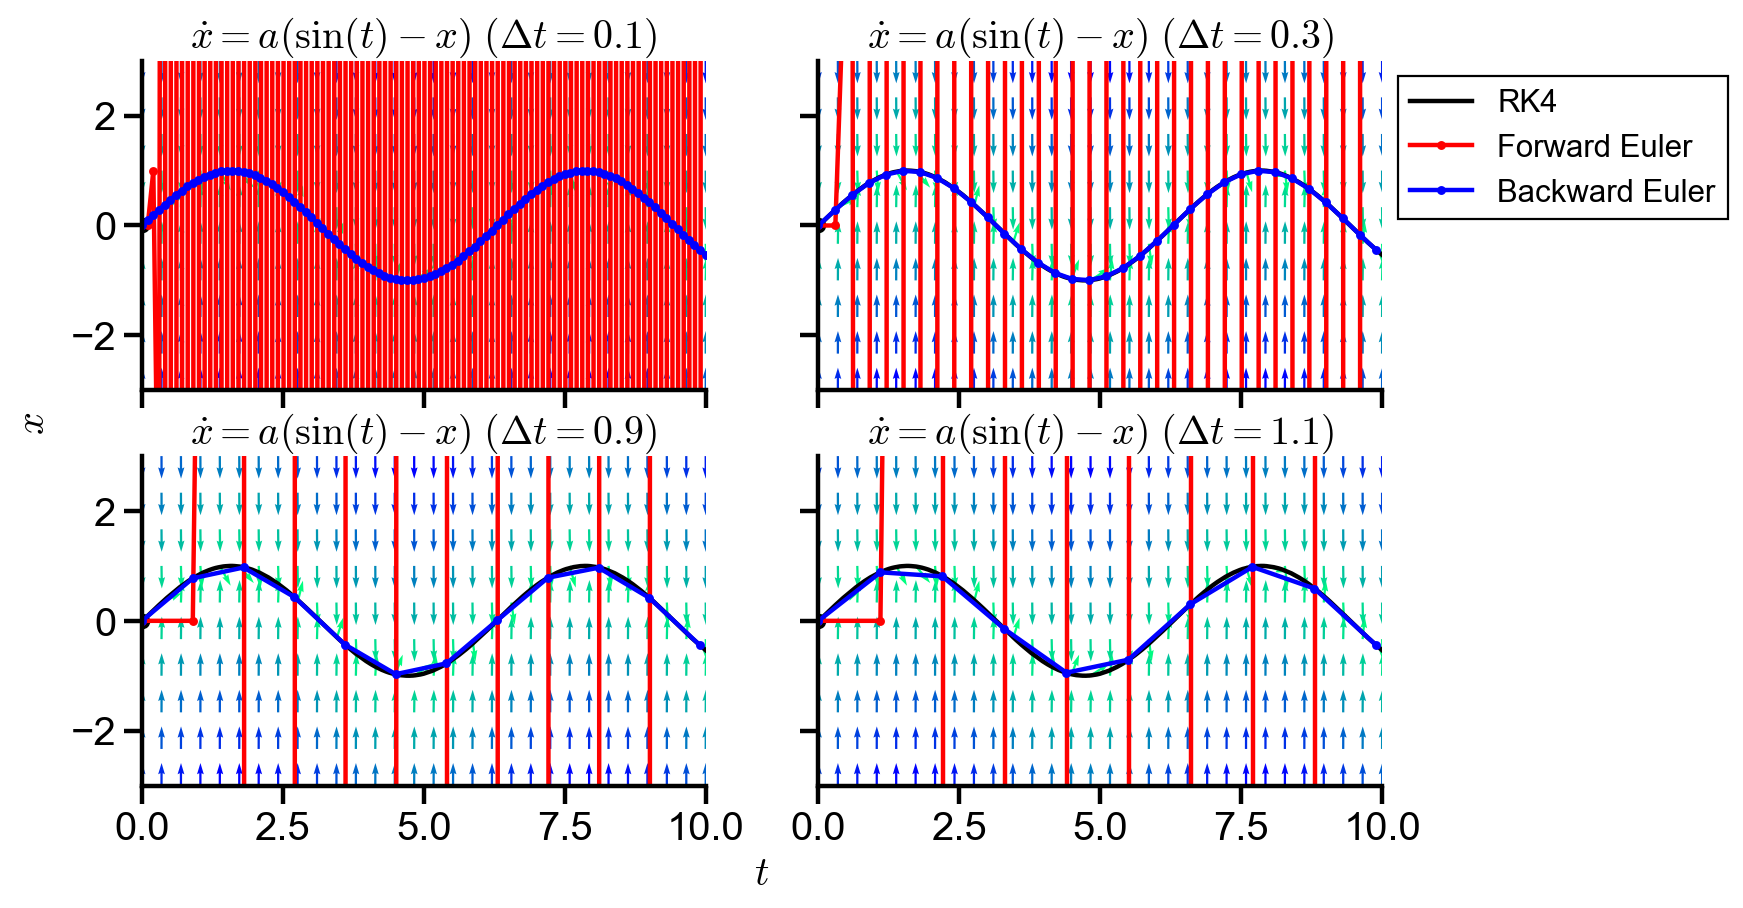

In [11]:
stiff_demo(a=100)

▲ The figure above shows the numerical solutions of the ODE with $a=100$. The ODE is a very stiff ODE because of the rapidly changing slope field shown by the vertical slope field at the given resolution. The slope field appears vertical even near the solution.

$\Delta t = 0.1$ - At small time step, backward Euler agrees closely with the RK4 solution. However, forward Euler overshoots even with small time step because the time step is not small enough to capture the rapidly changing derivative, causing overshoot and oscillatory behavior.

The situations for $\Delta t = 0.3, 0.9, 1.1$ are similar to $\Delta t = 0.1$.